# **TabTransformer: The Transformer for tabular data**
*By Cristian Leo*

In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models import TabTransformerConfig

In [20]:
# Load the dataset
df = pd.read_csv('data/kddcup.data_10_percent_corrected', header=None)

# Define column names based on the KDD'99 dataset
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label"
]

df.columns = columns

# Quick look at the dataset
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [24]:
# Encode the labels (Normal or Attack types)
df['label'] = LabelEncoder().fit_transform(df['label'])

# Encode categorical columns
categorical_columns = ['protocol_type', 'service', 'flag']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

num_cols = [col for col in df.columns if col not in categorical_columns + ['label']]

# Define the target and feature columns
target = 'label'
features = df.drop(columns=[target])

# Split the dataset into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert to PyTorch Tabular compatible format
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [25]:

# Define the configurations
data_config = DataConfig(
    target=['label'],
    continuous_cols=num_cols,
    categorical_cols=categorical_columns
)

model_config = TabTransformerConfig(
    task="classification",
    metrics=["accuracy"]
)

trainer_config = TrainerConfig(
    max_epochs=10,
    # gpus=1 if torch.cuda.is_available() else 0
)

optimizer_config = OptimizerConfig()

# Initialize the model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

# Fit the model
tabular_model.fit(train=train_df, validation=test_df)

2024-09-07 19:09:57,174 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-09-07 19:09:57,185 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-09-07 19:09:57,290 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
classification task

2024-09-07 19:09:57,621 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-09-07 19:09:57,719 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-09-07 19:09:57,925 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

Missing logger folder: /Users/cristianleo/Documents/Documents - Cristian’s Laptop/GitHub/models-from-scratch-python/TabTransformer/lightning_logs


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  271 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │  2.6 K │
│ 2 │ _head            │ LinearHead             │  3.1 K │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 277 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 277 K                                                                                                
Total estimated model params size (MB): 1

Output()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_lightning/trainer/connector
s/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider 
increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_lightning/trainer/connector
s/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider 
increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.

2024-09-07 19:51:15,322 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-09-07 19:51:15,323 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  retur

In [26]:
# Evaluate the model
test_metrics = tabular_model.evaluate(test_df)
print(test_metrics)

Output()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9893730282783508     │
│         test_loss         │     2.305927276611328     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 2.305927276611328, 'test_accuracy': 0.9893730282783508}]


# **Exploring the architecture from scratch**

In [128]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

In [129]:
def encode_date(date_str):
    reference_date = datetime(2000, 1, 1)
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    return (date_obj - reference_date).days

# Example customer data (assuming last purchase is categorical, and we encode the date)
customer_age = 35
customer_income = 60000
customer_last_purchase = encode_date('2023-10-27')  # Convert to numeric

# Creating the input vector x (all numeric now)
x = np.array([customer_age, customer_income, customer_last_purchase])

print(x)


[   35 60000  8700]


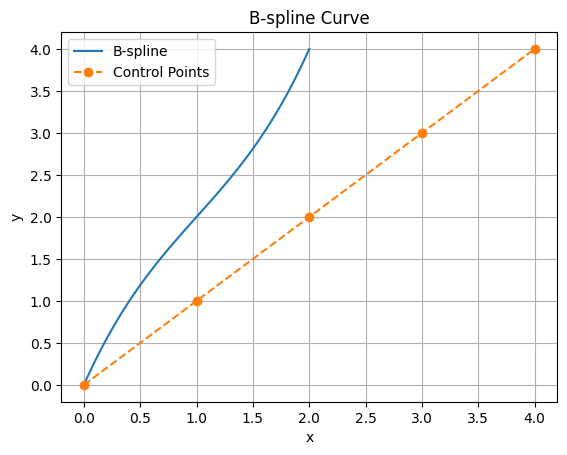

In [130]:
def univariate_function(x, control_points, degree):
    num_control_points = len(control_points)
    if num_control_points < degree + 1:
        raise ValueError(f"Need at least {degree + 1} control points for degree {degree}")
    
    knot_vector = np.concatenate(([0] * degree, np.arange(num_control_points - degree + 1), [num_control_points - degree] * degree))
    
    spline = BSpline(knot_vector, control_points, degree)
    return spline(x)


control_points = np.array([0, 1, 2, 3, 4])
degree = 3  # degree of the spline

# Generate a range of parameter values
x_values = np.linspace(0, len(control_points) - degree, 100)

# Evaluate the B-spline at these parameter values
y_values = univariate_function(x_values, control_points, degree)

# Plot the B-spline
plt.plot(x_values, y_values, label='B-spline')
plt.plot(np.arange(len(control_points)), control_points, 'o--', label='Control Points')
plt.legend()
plt.title('B-spline Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [141]:
class MultiHeadAttention:
    """
    Multi-head attention.

    Parameters:
    num_hiddens: int
        Number of hidden units.
    num_heads: int
        Number of attention heads.
    dropout: float
        Dropout rate.
    bias: bool
        Whether to include bias parameters in the model.
    """
    def __init__(self, num_hiddens, num_heads, bias=False):
        self.num_heads = num_heads
        self.num_hiddens = num_hiddens
        self.d_k = self.d_v = num_hiddens // num_heads
        
        self.W_q = np.random.rand(num_hiddens, num_hiddens)
        self.W_k = np.random.rand(num_hiddens, num_hiddens)
        self.W_v = np.random.rand(num_hiddens, num_hiddens)
        self.W_o = np.random.rand(num_hiddens, num_hiddens)
        
        if bias:
            self.b_q = np.random.rand(num_hiddens)
            self.b_k = np.random.rand(num_hiddens)
            self.b_v = np.random.rand(num_hiddens)
            self.b_o = np.random.rand(num_hiddens)
        else:
            self.b_q = self.b_k = self.b_v = self.b_o = np.zeros(num_hiddens)

    def __call__(self, queries, keys, values, valid_lens=None):
        """
        Forward pass.
        """
        return self.forward(queries, keys, values, valid_lens)

    def transpose_qkv(self, X):
        """
        Transposition for batch processing
        """
        X = X.reshape(X.shape[0], X.shape[1], self.num_heads, -1)
        X = X.transpose(0, 2, 1, 3)
        return X.reshape(-1, X.shape[2], X.shape[3])
    
    def transpose_output(self, X):
        """
        Transposition for output
        """
        X = X.reshape(-1, self.num_heads, X.shape[1], X.shape[2])
        X = X.transpose(0, 2, 1, 3)
        return X.reshape(X.shape[0], X.shape[1], -1)
    
    def scaled_dot_product_attention(self, Q, K, V, valid_lens):
        """
        Scaled dot product attention
        """
        d_k = Q.shape[-1]
        scores = np.matmul(Q, K.transpose(0, 2, 1)) / np.sqrt(d_k)
        if valid_lens is not None:
            mask = np.arange(scores.shape[-1]) < valid_lens[:, None]
            scores = np.where(mask[:, None, :], scores, -np.inf)
        attention_weights = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
        attention_weights /= attention_weights.sum(axis=-1, keepdims=True)
        return np.matmul(attention_weights, V)
    
    def forward(self, queries, keys, values, valid_lens):
        """
        Forward pass
        """
        queries = self.transpose_qkv(np.dot(queries, self.W_q) + self.b_q)
        keys = self.transpose_qkv(np.dot(keys, self.W_k) + self.b_k)
        values = self.transpose_qkv(np.dot(values, self.W_v) + self.b_v)
        
        if valid_lens is not None:
            valid_lens = np.repeat(valid_lens, self.num_heads, axis=0)
        
        output = self.scaled_dot_product_attention(queries, keys, values, valid_lens)
        output_concat = self.transpose_output(output)
        return np.dot(output_concat, self.W_o) + self.b_o

# Example usage for a transformer layer (categorical features handled via embeddings)
num_features = len(x)
num_layers = 3  # Number of layers in the model
embedding_dim = 16  # Increased dimension for embedding
num_heads = 4  # Number of attention heads

categorical_features = [2]  # Assume the third feature is categorical (encoded date)

# Layer transformation function
def layer_transform(x):
    x_transformed = np.zeros_like(x)
    
    for p in range(num_features):
        if p in categorical_features:
            # Create a tensor of the correct shape for the attention layer
            cat_feature_tensor = np.random.randn(1, 1, embedding_dim)  # Shape: (batch_size, seq_len, embedding_dim)
            mha = MultiHeadAttention(embedding_dim, num_heads)
            transformed = mha(cat_feature_tensor, cat_feature_tensor, cat_feature_tensor)
            x_transformed[p] = transformed.mean()  # Simplify by averaging the output
            
        else:
            # Ensure control points match required size
            control_points = np.linspace(0, 1, degree + 2)  # Generate control points if needed
            x_transformed[p] = univariate_function(x[p], control_points, degree)
    
    return x_transformed

# Example layer transformation
x_transformed = layer_transform(x)

# Print the transformed input
print(f"Transformed input: {x_transformed}")

Transformed input: [          4926 26998650045000             -6]
